## **Setup the environment**

In [1]:
! wget https://www.lancaster.ac.uk/scc/sites/lora/lorasim-20170710.tgz
! tar -xvf lorasim-20170710.tgz

!sudo apt-get install python2 && curl https://bootstrap.pypa.io/pip/2.7/get-pip.py -o get-pip.py && python2 get-pip.py && rm get-pip.py
!sudo apt install python-tk
!pip2 install -r 'lorasim/requirements.txt'

--2025-04-26 21:33:10--  https://www.lancaster.ac.uk/scc/sites/lora/lorasim-20170710.tgz
Resolving www.lancaster.ac.uk (www.lancaster.ac.uk)... 148.88.65.80, 2001:630:80:2ff::80:1
Connecting to www.lancaster.ac.uk (www.lancaster.ac.uk)|148.88.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112640 (110K) [application/x-gzip]
Saving to: ‘lorasim-20170710.tgz.1’

lorasim-20170710.tg 100%[===================>] 110.00K   314KB/s    in 0.4s    

2025-04-26 21:33:12 (314 KB/s) - ‘lorasim-20170710.tgz.1’ saved [112640/112640]

lorasim/
lorasim/loraDir.py
lorasim/loraDirMulBS.py
lorasim/oneDirectionalLoraIntf.py
lorasim/requirements.txt
lorasim/directionalLoraIntf.py
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python2 is already the newest version (2.7.18-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
          

## **Play with the simulator**

### **Import libraries**

In [2]:
import os
import pandas as pd
import math

### **Execute simulations**

In [3]:
import subprocess

def simulate(n_nodes, tx_rate, exp, duration):
    env = os.environ.copy()
    env["MPLBACKEND"] = "Agg"

    # Use subprocess.run to execute the command and capture output
    result = subprocess.run(
        [
            "python2",
            "lorasim/loraDir.py",
            str(int(n_nodes)),
            str(int(tx_rate)),
            str(int(exp)),
            str(int(duration)),
            str(1),
        ],
        env=env,
        capture_output=True,
        text=True,  # Capture output as text
    )

    # Print the output
    # print(result.stdout)
    # print(result.stderr)

def simulate_multiBS(n_nodes, tx_rate, exp, duration, bs_number):
    env = os.environ.copy()
    env["MPLBACKEND"] = "Agg"

    result = subprocess.run(
        [
            "python2",
            "lorasim/loraDirMulBS.py",
            str(int(n_nodes)),
            str(int(tx_rate)),
            str(int(exp)),
            str(int(duration)),
            str(int(bs_number)),
            str(1),
        ],
        env=env,
        capture_output=True,
        text=True,  # Capture output as text
    )

# Der in aloha defined as S/G = e^(-2G)
def aloha_der(n_nodes,t):
    rate = 1e-6
    return math.exp(-2 * n_nodes * rate * t)


In [4]:
!rm exp*.dat
duration = 86400000 #1 day
tx_rate = 1e6

node_ranges = list(range(1,10)) + list(range(10,300,10)) + list(range(300,1650,100))
for n_nodes in node_ranges:
  print(f"Simulating {n_nodes} nodes")
  simulate(n_nodes, tx_rate, 4, duration)
  simulate(n_nodes, tx_rate, 3, duration)
  simulate(n_nodes, tx_rate, 5, duration)

Simulating 1 nodes
Simulating 2 nodes
Simulating 3 nodes
Simulating 4 nodes
Simulating 5 nodes
Simulating 6 nodes
Simulating 7 nodes
Simulating 8 nodes
Simulating 9 nodes
Simulating 10 nodes
Simulating 20 nodes
Simulating 30 nodes
Simulating 40 nodes
Simulating 50 nodes
Simulating 60 nodes
Simulating 70 nodes
Simulating 80 nodes
Simulating 90 nodes
Simulating 100 nodes
Simulating 110 nodes
Simulating 120 nodes
Simulating 130 nodes
Simulating 140 nodes
Simulating 150 nodes
Simulating 160 nodes
Simulating 170 nodes
Simulating 180 nodes
Simulating 190 nodes
Simulating 200 nodes
Simulating 210 nodes
Simulating 220 nodes
Simulating 230 nodes
Simulating 240 nodes
Simulating 250 nodes
Simulating 260 nodes
Simulating 270 nodes
Simulating 280 nodes
Simulating 290 nodes
Simulating 300 nodes
Simulating 400 nodes
Simulating 500 nodes
Simulating 600 nodes
Simulating 700 nodes
Simulating 800 nodes
Simulating 900 nodes
Simulating 1000 nodes
Simulating 1100 nodes
Simulating 1200 nodes
Simulating 1300 

In [5]:
data4 = pd.read_csv("exp4.dat", sep=" ")
data3 = pd.read_csv("exp3.dat", sep=" ")
data5 = pd.read_csv("exp5.dat", sep=" ")

In [6]:
data4["der"] = (data4["nrTransmissions"] - data4["nrCollisions"]) / data4["nrTransmissions"]
data3["der"] = (data3["nrTransmissions"] - data3["nrCollisions"]) / data3["nrTransmissions"]
data5["der"] = (data5["nrTransmissions"] - data5["nrCollisions"]) / data5["nrTransmissions"]

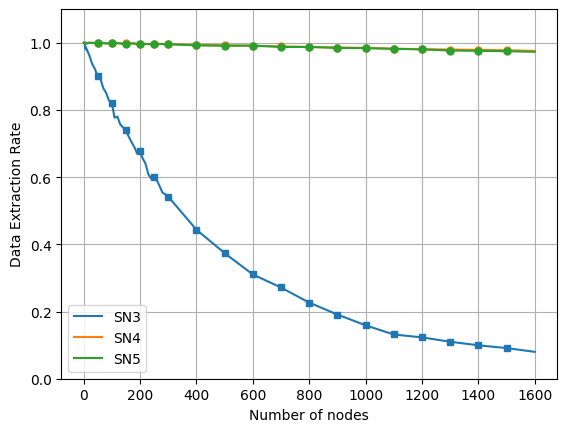

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

marker_indices = np.arange(data4["#nrNodes"].min()-1, data4["#nrNodes"].max(), 50)

line, = plt.plot(data4["#nrNodes"], data4["der"], label="SN3")
line_color = matplotlib.pyplot.getp(line, 'color')
plt.plot(data4["#nrNodes"][data4["#nrNodes"].isin(marker_indices)], data4["der"][data4["#nrNodes"].isin(marker_indices)], marker='s', linestyle='', markersize=5, color=line_color)

line, = plt.plot(data3["#nrNodes"], data3["der"], label="SN4")
line_color = matplotlib.pyplot.getp(line, 'color')
plt.plot(data3["#nrNodes"][data3["#nrNodes"].isin(marker_indices)], data3["der"][data3["#nrNodes"].isin(marker_indices)], marker='o', linestyle='', fillstyle='none', markersize=5, color=line_color)

line, = plt.plot(data5["#nrNodes"], data5["der"], label="SN5")
line_color = matplotlib.pyplot.getp(line, 'color')
plt.plot(data5["#nrNodes"][data5["#nrNodes"].isin(marker_indices)], data5["der"][data5["#nrNodes"].isin(marker_indices)], marker='o', linestyle='', markersize=5, color=line_color)

plt.xlabel("Number of nodes")
plt.ylabel("Data Extraction Rate")
plt.legend()
plt.ylim(0,1.1)
plt.grid()
plt.savefig("figure5.png")
plt.show()

In [8]:
!rm exp*.dat
!rm nodes.txt
!rm basestation.txt

duration = 86400000 # 1 day
tx_rate = 1e6
bs_numbers = [1,2,3,4,8,24]

for n_nodes in list(range(1,10)) + list(range(10,300,10)) + list(range(300,1650,100)):
  for bs_number in bs_numbers:
    print(f"Simulating {n_nodes} nodes with {bs_number} BS")
    simulate_multiBS(n_nodes, tx_rate, 0, duration, bs_number) # 1 best

rm: cannot remove 'nodes.txt': No such file or directory
rm: cannot remove 'basestation.txt': No such file or directory
Simulating 1 nodes with 1 BS
Simulating 1 nodes with 2 BS
Simulating 1 nodes with 3 BS
Simulating 1 nodes with 4 BS
Simulating 1 nodes with 8 BS
Simulating 1 nodes with 24 BS
Simulating 2 nodes with 1 BS
Simulating 2 nodes with 2 BS
Simulating 2 nodes with 3 BS
Simulating 2 nodes with 4 BS
Simulating 2 nodes with 8 BS
Simulating 2 nodes with 24 BS
Simulating 3 nodes with 1 BS
Simulating 3 nodes with 2 BS
Simulating 3 nodes with 3 BS
Simulating 3 nodes with 4 BS
Simulating 3 nodes with 8 BS
Simulating 3 nodes with 24 BS
Simulating 4 nodes with 1 BS
Simulating 4 nodes with 2 BS
Simulating 4 nodes with 3 BS
Simulating 4 nodes with 4 BS
Simulating 4 nodes with 8 BS
Simulating 4 nodes with 24 BS
Simulating 5 nodes with 1 BS
Simulating 5 nodes with 2 BS
Simulating 5 nodes with 3 BS
Simulating 5 nodes with 4 BS
Simulating 5 nodes with 8 BS
Simulating 5 nodes with 24 BS
Simul

In [9]:
dataBS1 = pd.read_csv("exp0BS1.dat", sep=" ").drop(columns=['DER']).rename(columns={'#': '#nrNodes', 'nrNodes': 'DER'})
dataBS2 = pd.read_csv("exp0BS2.dat", sep=" ").drop(columns=['DER']).rename(columns={'#': '#nrNodes', 'nrNodes': 'DER'})
dataBS3 = pd.read_csv("exp0BS3.dat", sep=" ").drop(columns=['DER']).rename(columns={'#': '#nrNodes', 'nrNodes': 'DER'})
dataBS4 = pd.read_csv("exp0BS4.dat", sep=" ").drop(columns=['DER']).rename(columns={'#': '#nrNodes', 'nrNodes': 'DER'})
dataBS8 = pd.read_csv("exp0BS8.dat", sep=" ").drop(columns=['DER']).rename(columns={'#': '#nrNodes', 'nrNodes': 'DER'})
dataBS24 = pd.read_csv("exp0BS24.dat", sep=" ").drop(columns=['DER']).rename(columns={'#': '#nrNodes', 'nrNodes': 'DER'})

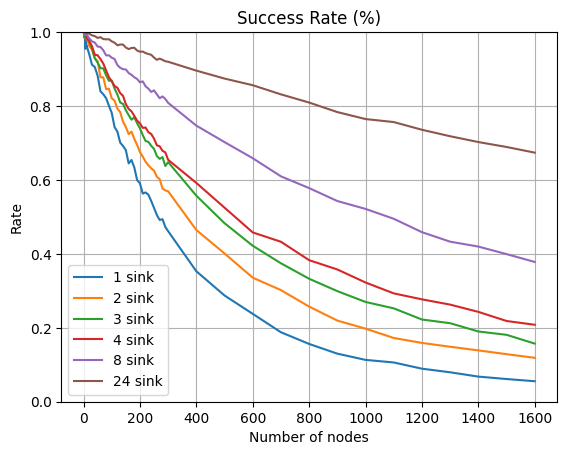

In [12]:
plt.plot(dataBS2["#nrNodes"], dataBS1["DER"], label="1 sink")
plt.plot(dataBS2["#nrNodes"], dataBS2["DER"], label="2 sink")
plt.plot(dataBS3["#nrNodes"], dataBS3["DER"], label="3 sink")
plt.plot(dataBS4["#nrNodes"], dataBS4["DER"], label="4 sink")
plt.plot(dataBS8["#nrNodes"], dataBS8["DER"], label="8 sink")
plt.plot(dataBS24["#nrNodes"], dataBS24["DER"], label="24 sink")
plt.title("Success Rate (%)")
plt.xlabel("Number of nodes")
plt.ylabel("Rate")
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.savefig("figure7.png")
plt.show()